<a href="https://colab.research.google.com/github/XuRui314/MathematicalModeling/blob/main/Mathematical_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparation

In [44]:
# preparation
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# 遇到了latex报错的解决方法：1.把含有latex的部分去掉 2.用下面导包安装，但是仅限于英文
# ! sudo apt-get install texlive-latex-recommended 
# ! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
# ! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
# ! unzip type1cm.zip -d /tmp/type1cm 
# ! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
# ! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
# ! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
# ! sudo texhash 
# !apt install cm-super

# 这个是英文+繁体中文
# !wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# import matplotlib as mpl
# import matplotlib.pyplot as plt 
# from matplotlib.font_manager import fontManager

# # 改style要在改font之前
# plt.style.use('seaborn')  

# fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
# mpl.rc('font', family='Taipei Sans TC Beta')

# 下面的是简体中文+英文
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn

--2022-07-16 06:44:41--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  5.61MB/s    in 1.7s    

2022-07-16 06:44:43 (5.61 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fsKERl26TNTFIY25PhReoCujxwJvfyHn
To: /content/drive/My Drive/dataset/MathModel/Integer_Programming/SimHei .ttf
100% 10.1M/10.1M [00

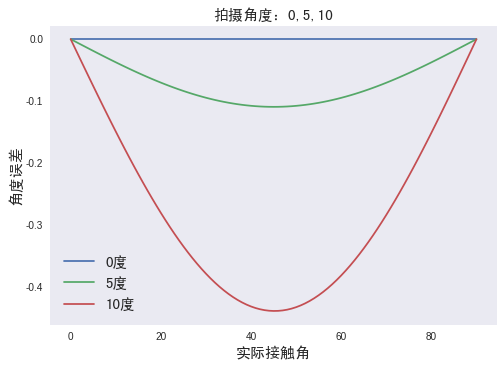

In [46]:
# 下面用两个例子展示效果
import matplotlib as mpl
plt.style.use('seaborn') 
zhfont = mpl.font_manager.FontProperties(fname='SimHei .ttf')

import numpy as np
import matplotlib.pyplot as plt

theta = range(0,91)
alpha = range(0,46)
contact_angle = np.zeros((91,46),dtype=np.float64)

for j in alpha:
  for i in theta:
    pass
    contact_angle[i][j] = np.arctan(np.cos(j*np.pi/180)*np.tan(i*np.pi/180))*180/np.pi-i

plt.figure()

plt.title("拍摄角度：0,5,10",fontproperties=zhfont)
plt.xlabel(u"实际接触角",fontproperties=zhfont)
plt.ylabel(u"角度误差",fontproperties=zhfont)
for i in range(0,11,5):
  plt.plot(theta,contact_angle[:,i])
  plt.legends="x"
plt.legend([u'0度',u'5度',u'10度'],loc='best',prop=zhfont)
plt.grid()
plt.show()

Text(2, -5, '区域最小值')

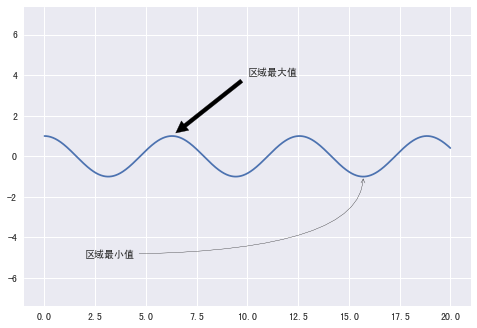

In [47]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
plt.style.use('seaborn')  

fontManager.addfont('SimHei .ttf')
mpl.rc('font', family='SimHei')


fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate(
    '区域最大值', 
    xy=(6.28, 1), 
    xytext=(10, 4),
    arrowprops=dict(facecolor='black', shrink=0.05)
    )

ax.annotate(
    '区域最小值', 
    xy=(5*np.pi, -1), 
    xytext=(2, -5),
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="angle3,angleA=0,angleB=-90"
        )
    )

## Linear Programming

线性规划三个要素：决策变量、目标函数、约束条件。

一般来说，对于一个问题，首先是要确定决策变量，这个选定可能是具有时序的特征的，考虑利用矩阵作为参数，而不是向量，针对问题系统的输入输出平衡等内在性质去利用决策变量设计目标函数，然后再把约束条件写写。

**Example**

Object Function: $min\sum_{i=1}^6 \sum_{j=1}^8 c_{ij}x_{ij}$

Constraints: \begin{equation}
y(x)=\left\{
	\begin{aligned}
	\sum_{i=1}^6 = d_j\\
	\sum_{j=1}^8 \leq e_i\\
	x_{ij} \geq 0\\
	\end{aligned}
	\right
	.
\end{equation}
       

In [48]:
import os
os.chdir("/content/drive/MyDrive/dataset/MathModel/Linear_Programming")
!ls

 chinese.simhei.ttf  'SimHei .ttf'		     type1cm.zip.1
 data4_5_1.txt	      TaipeiSansTCBeta-Regular.ttf
 sharefonts.net.txt   type1cm.zip


In [49]:
import cvxpy as cp
import pandas as pd
import numpy as np

In [50]:
# 数据集样式
pd.read_csv("data4_5_1.txt",sep='\t', header=None)

,0,1,2,3,4,5,6,7,8
0,6,2,6,7,4,2,5,9,60
1,4,9,5,3,8,5,8,2,55
2,5,2,1,9,7,4,3,3,51
3,7,6,7,3,9,2,7,1,43
4,2,3,9,5,7,2,6,5,41
5,5,5,2,2,8,1,4,3,52
6,35,37,22,32,41,32,43,38,


In [51]:
# genformtxt用法，重点是可以考虑缺失值 https://segmentfault.com/a/1190000014768786
c = np.genfromtxt("data4_5_1.txt", dtype=float, max_rows=6, usecols=range(8))
e = np.genfromtxt("data4_5_1.txt", dtype=float, max_rows=6, usecols=8)
d = np.genfromtxt("data4_5_1.txt", dtype=float, skip_header=6) 

In [52]:
x = cp.Variable((6,8), pos=True)
obj = cp.Minimize(cp.sum(cp.multiply(c,x)))
con = [cp.sum(x, axis = 0) == d,
     cp.sum(x, axis = 1) <= e]
prob = cp.Problem(obj, con)
prob.solve(solver='GLPK_MI')
print("最优值为：", prob.value)
print("最优解为：", x.value)

最优值为： 664.0
最优解为： [[ 0. 19.  0.  0. 41.  0.  0.  0.]
 [ 0.  0.  0. 32.  0.  0.  0.  1.]
 [ 0. 12. 22.  0.  0.  0. 17.  0.]
 [ 0.  0.  0.  0.  0.  6.  0. 37.]
 [35.  6.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 26. 26.  0.]]


In [53]:
xd = pd.DataFrame(x.value)
xd

,0,1,2,3,4,5,6,7
0,0.0,19.0,0.0,0.0,41.0,0.0,0.0,0.0
1,0.0,0.0,0.0,32.0,0.0,0.0,0.0,1.0
2,0.0,12.0,22.0,0.0,0.0,0.0,17.0,0.0
3,0.0,0.0,0.0,0.0,0.0,6.0,0.0,37.0
4,35.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,26.0,26.0,0.0


**投资的收益和风险问题**

Point：

*   翻译题目，把各个概念联系明确
*   模型简化，也就是把复杂的多目标变成单一目标线性规划




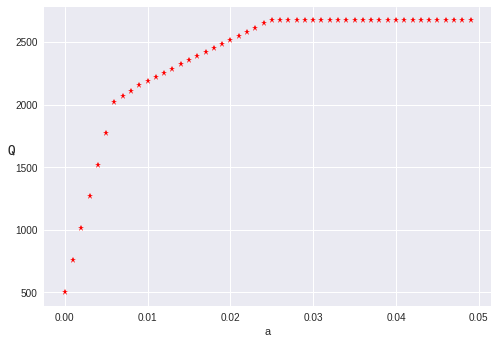

In [54]:
# 模型一
import cvxpy as cp
import pylab as plt
plt.style.use('seaborn') 
b = plt.array([0.025, 0.015, 0.055, 0.026])  
c = plt.array([0.05, 0.27, 0.19, 0.185, 0.185])
x = cp.Variable(5, pos=True)
aeq = plt.array([1, 1.01, 1.02, 1.045, 1.065])
obj = cp.Maximize( c @ x)
a = 0; aa = []; Q = []; X = []; M = 10000;             
while a < 0.05:
    con = [aeq @ x == M, cp.multiply(b,x[1:])<=a*M]
    prob = cp.Problem(obj, con)
    prob.solve(solver='GLPK_MI')
    aa.append(a); Q.append(prob.value)
    X.append(x.value)
    a = a + 0.001
plt.plot(aa, Q, 'r*'); plt.xlabel('a')
plt.ylabel('Q', rotation=0, fontproperties=zhfont); plt.show()

w= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
V= [247.52 247.52 247.52 247.52 247.52 247.52 247.52 247.52  92.25  59.4
   0.  ]
Q= [2673.27 2673.27 2673.27 2673.27 2673.27 2673.27 2673.27 2673.27 2164.82
 2016.24  500.  ]
--------------
w= [0.766 0.767 0.81  0.811 0.824 0.825 0.962 0.963 1.   ]
V= [247.52  92.25  92.25  78.49  78.49  59.4   59.4    0.     0.  ]
Q= [2673.27 2164.82 2164.82 2105.99 2105.99 2016.24 2016.24  500.    500.  ]
[4.54747351e-13 2.37583954e+03 3.95973257e+03 1.07992706e+03
 2.28446110e+03 5.93959885e+01]


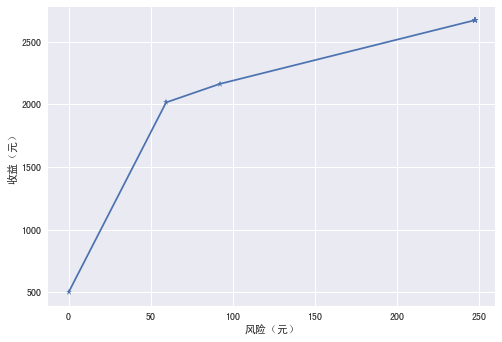

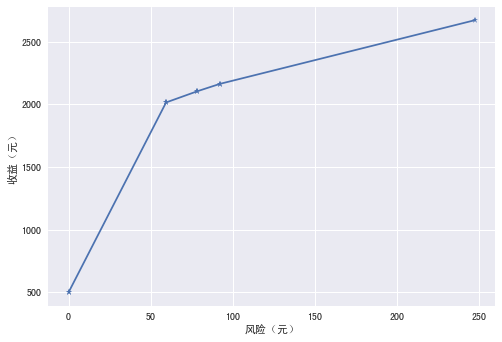

In [55]:
import numpy as np
import cvxpy as cp
import pylab as plt

plt.rc('font', family='SimHei')
plt.rc('font', size=15)
x = cp.Variable(6, pos = True)
r = np.array([0.05, 0.28, 0.21, 0.23, 0.25])
p = np.array([0, 0.01, 0.02, 0.045, 0.065])
q = np.array([0, 0.025, 0.015, 0.055, 0.026])

def LP(w):
    V = []  #风险初始化
    Q = []  #收益初始化
    X = []  #最优解的初始化
    con = [(1+p) @ x[: -1] == 10000, cp.multiply(q[1:],x[1:5])<=x[5]]
    for i in range(len(w)):
        obj = cp.Minimize(w[i] * x[5] - (1-w[i]) *((r-p) @ x[: -1]))
        prob = cp.Problem(obj, con)
        prob.solve(solver='GLPK_MI')
        xx = x.value   #提出所有决策变量的取值
        V.append(max(q*xx[:-1]))
        Q.append((r-p)@xx[:-1]); X.append(xx)
    print('w=', w);     print('V=', np.round(V,2))
    print('Q=', np.round(Q,2))
    plt.figure(); plt.plot(V, Q, '*-'); plt.grid('on')
    plt.xlabel(u'风险（元）'); plt.ylabel(u'收益（元）')
    return X

w1 = np.arange(0, 1.1, 0.1)
LP(w1); print('--------------')
w2 = np.array([0.766, 0.767, 0.810, 0.811, 0.824, 0.825, 0.962, 0.963, 1.0])
X=LP(w2); print(X[-3]); plt.show()

## Integer Programming


整数规划对于变量又增加了限制，对于0-1整数规划，其实就是把决策的搜索过程用0-1变量表示出来了，通俗一点就是翻译题目，然后再调库解决问题，重点还是对于问题的分析吧。

**例题**：已知10个商业网点的坐标如下面的数据集所示，第一行为x坐标，第二行为y坐标，现在要在10个网点中选择合适的供应站，要求供应站只能覆盖10km以内的网点，且每个供应站对多供应5个网点，如何设置才能使供应站数目最小，求最小供应站个数。

In [56]:
import os
os.chdir("/content/drive/MyDrive/dataset/MathModel/Integer_Programming")
!ls

 chinese.simhei.ttf   data4_13_1.xlsx   TaipeiSansTCBeta-Regular.ttf
 data4_11.txt	     'SimHei .ttf'      type1cm.zip


In [57]:
import cvxpy as cp
import pandas as pd
import numpy as np

In [58]:
# 数据集样式
pd.read_csv("data4_11.txt",sep='\t', header=None)

,0,1,2,3,4,5,6,7,8,9
0,9.4888,8.7928,11.5960,11.5643,5.6756,9.8497,9.1756,13.1385,15.4663,15.5464
1,5.6817,10.3868,3.9294,4.4325,9.9658,17.6632,6.1517,11.8569,8.8721,15.5868


In [59]:
data = np.loadtxt("data4_11.txt")
d = np.zeros((10,10))
for i in range(10):
  for j in range(10):
    d[i,j] = np.linalg.norm(data[:,i] - data[:,j]) # 求距离
x = cp.Variable(10, integer = True)
y = cp.Variable((10,10), integer = True)
obj = cp.Minimize(sum(x))
con = [sum(y)>=1, cp.sum(y,axis=1)<=5,
       x>=0, x<=1, y>=0, y<=1]
for i in range(10):
  con.append(x[i] == y[i,i])
  for j in range(10):
    con.append(x[i]>=y[i,j])
    con.append(d[i,j]*y[i,j]<=10)
prob = cp.Problem(obj, con)
prob.solve(solver = "GLPK_MI")
print("最优值为：", prob.value)
print("最优解为：", x.value)

最优值为： 2.0
最优解为： [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


 **比赛安排问题**

利用TSP建模求解。

In [60]:
import numpy as np
import cvxpy as cp
import pandas as pd

data = pd.read_excel("data4_13_1.xlsx", header=None)

In [61]:
data[0:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN
2,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0


In [62]:
data = data.values
data[np.isnan(data)] = 0

In [63]:
data[0:5]

array([[0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.]])

In [64]:
m,n = data.shape
w = np.ones((n+1, n+1)) * 10000000 # 邻接表初始化
for i in range(n):
  for j in range(n):
    if i!=j: w[i,j] = sum(data[:,i]*data[:,j])
for i in range(n):
  w[i,n] = 0; w[n,i] = 0
x = cp.Variable((n+1, n+1),integer = True)
u = cp.Variable(n+1, integer = True)
obj = cp.Minimize(cp.sum(cp.multiply(w,x)))
con = [cp.sum(x, axis=0)==1, cp.sum(x,axis=1)==1,
       x>=0, x<=1, u[0]==0, u[1:]>=1, u[1:]<=n]
for i in range(n+1):
  for j in range(1, n+1):
    con.append(u[i]-u[j]+(n+1)*x[i,j]<=n)
prob = cp.Problem(obj, con)
prob.solve(solver = "GLPK_MI")
print("最小值为：", prob.value)
print("最优解为：", x.value)
i,j = np.nonzero(x.value)
print("xij=1的行列位置：")
print(i+1);print(j+1)

最小值为： 2.0
最优解为： [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
xij=1的行列位置：
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 5 14  6  9 11  2  3  1  8 13  7 10 15 12  4]


## Simple Non-Linear Programming

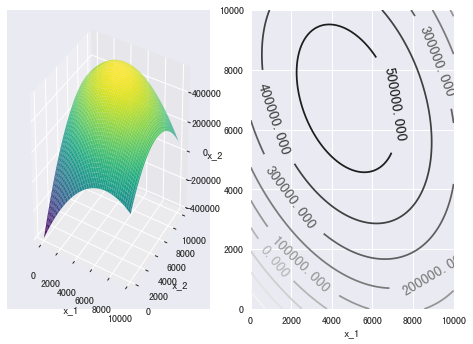

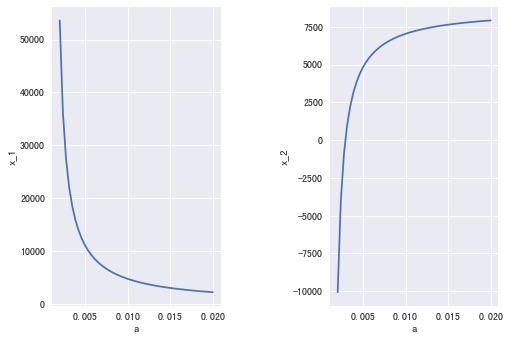

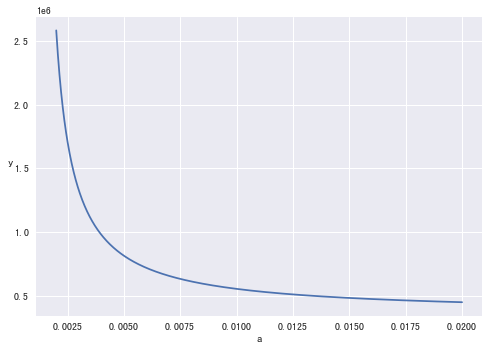

In [65]:
# sympy的使用：https://zhuanlan.zhihu.com/p/111573239
import sympy as sp

sp.var('x1, x2')  #定义符号变量
y = (339-0.01*x1-0.003*x2)*x1+(399-0.004*x1-0.01*x2)*x2-(400000+195*x1+225*x2)
y = sp.simplify(y)   #化简
dy1 = y.diff(x1)     #求关于x1的偏导
dy2 = y.diff(x2)     #求关于x2的偏导
s = sp.solve([dy1, dy2], [x1, x2])
x10 = round(float(s[x1]))   #取整
x20 = round(float(s[x2]))
y0 = y.subs({x1: x10, x2: x20})  #符号函数代入数值
f = sp.lambdify('x1, x2', y, 'numpy')  #符号函数转换为匿名函数
x = plt.linspace(0, 10000, 100)
X, Y = plt.meshgrid(x, x)  #转换为网格数据
Z = f(X, Y)
ax=plt.subplot(121, projection='3d')  #第一个子窗口三维画图 表示将整个图像窗口分为1行2列,当前位置为1,第一行的左图
ax.plot_surface(X, Y, Z,cmap='viridis')
ax.set_xlabel('x_1'); ax.set_ylabel('x_2')
plt.subplot(122)  #激活第二个子窗口
contr=plt.contour(X,Y,Z,10)  #10条等高线
plt.clabel(contr)   #等高线标注
plt.ylabel('x_2',rotation=0)
plt.xlabel('x_1')

sp.var('a', pos=True)  #定义灵敏度分析的符号参数
y = (339-a*x1-0.003*x2)*x1+(399-0.004*x1-0.01*x2)*x2-(400000+195*x1+225*x2)
y = sp.simplify(y)   #化简
dy1 = y.diff(x1)     #求关于x1的偏导
dy2 = y.diff(x2)     #求关于x2的偏导
s = sp.solve([dy1, dy2], [x1, x2])
sx1 = s[x1]; sx2 = s[x2]  #提取解分量
s1 = sp.lambdify('a', sx1, 'numpy')  #符号函数转换为匿名函数
s2 = sp.lambdify('a', sx2, 'numpy')
a0 = plt.linspace(0.002, 0.02, 50)
plt.figure()
plt.subplots_adjust(wspace = 0.65)
plt.subplot(121); plt.plot(a0, s1(a0))
plt.xlabel('a'); plt.ylabel('x_1')
plt.subplot(122); plt.plot(a0, s2(a0))
plt.xlabel('a'); plt.ylabel('x_2')
dx1 = sx1.diff(a); dx10 = dx1.subs(a, 0.01)
sx1a = dx10 * 0.01 / 4735
dx2 = sx2.diff(a); dx20 = dx2.subs(a, 0.01)
sx2a = dx20 * 0.01 / 7043
Y = y.subs({x1: s[x1], x2: s[x2]})  #求关于a的目标函数
Y = sp.factor(Y); Y = sp.simplify(Y)
Ya = sp.lambdify('a', Y, 'numpy')  #转换为匿名函数
a0 = plt.linspace(0.002, 0.02, 1000)
plt.figure(); plt.plot(a0, Ya(a0))
plt.xlabel('a'); plt.ylabel('y', rotation=0)
Sya = - 4735 ** 2 * 0.01 / 553641.025
y2 = y.subs({x1: 4735, x2: 7043, a: 0.011})  #计算近似最优利润
y3 = Y.subs(a, 0.011)   #计算最优利润
delta = (y3 - y2) / y2  #计算利润的相对误差
plt.show()



## Quadratic Programming
目标函数是决策变量的二次函数，约束条件全是线性的情况。

## Non-Linear Programming
对于一般的非线性规划问题，不是凸规划就不能用`cvxpy`库求解，而应该使用`scipy.optimize`模块下的`minimize`函数求解。

In [67]:
import os
os.chdir("/content/drive/MyDrive/dataset/MathModel/Non_Linear_Programming")
!ls

data5_8.txt


In [68]:
import numpy as np
from scipy.optimize import minimize

d = np.loadtxt('data5_8.txt')
a = d[0]; b = d[1]; c = d[2]
e = np.array([20, 20])

def obj(xyz):
    x = xyz[: 2]; y = xyz[2: 4]
    z = xyz [4:].reshape(6,2)
    obj =0
    for i in range(6):
        for j in range(2):
            obj = obj + z[i,j] * np.sqrt((x[j]-a[i])**2+(y[j]-b[i])**2)
    return obj

con = []
con.append({'type': 'eq', 'fun': lambda z: z[4:].reshape(6,2).sum(axis=1)-c})
con.append({'type': 'ineq', 'fun': lambda z: e-z[4:].reshape(6,2).sum(axis=0)})
bd = [(0, np.inf) for i in range(16)]  #决策向量的界限
res = minimize(obj, np.random.rand(16), constraints=con, bounds=bd)
print(res)  #输出解的信息
s=np.round(res.x, 4)     #提出最优解的取值
print('目标函数的最优值：', round(res.fun,4))
print('x的坐标为：', s[:2])
print('y的坐标为：', s[2:4])
print('料场到工地的运输量为：\n', s[4:].reshape(6,2).T)


     fun: 71.93522640722541
     jac: array([-3.92105198, -0.01173687, -5.58756542, -0.02742481,  8.8459034 ,
        4.42539406,  7.15891075,  7.05688763,  7.38664341,  2.79976646,
        4.45112324,  0.52093792,  4.4300108 ,  1.33647633,  0.        ,
        4.73643494])
 message: 'Optimization terminated successfully'
    nfev: 888
     nit: 49
    njev: 49
  status: 0
 success: True
       x: array([7.25000000e+00, 3.26496823e+00, 7.74999992e+00, 5.19005305e+00,
       1.44913051e-09, 3.00000000e+00, 4.99999999e+00, 5.65964251e-09,
       2.83349325e-09, 4.00000000e+00, 8.32818697e-09, 6.99999999e+00,
       7.38963421e-09, 5.99999999e+00, 1.10000000e+01, 1.52946540e-08])
目标函数的最优值： 71.9352
x的坐标为： [7.25  3.265]
y的坐标为： [7.75   5.1901]
料场到工地的运输量为：
 [[ 0.  5.  0.  0.  0. 11.]
 [ 3.  0.  4.  7.  6.  0.]]


## Multi-Target Programming

流程大体如下：


1.   根据题意进行分析并列出多目标函数以及约束条件
2.   数据预处理：无量纲处理、数量级归一处理
3.   选用合适的方法转换为单目标规划问题

这里给出几个求有效解的常用方法：
1.   线性加权法
2.   $\epsilon$约束法
3.   理想点法
4.   优先级法



**例题:**

目标函数：
\begin{equation}
 min\{-f_1(x), f_2(x) \}     \\
   f_1(x) = 2x_1 + 3x_2\\
  f_2(x) = x_1 + 2x_2 \\
\end{equation}

约束：


\begin{equation}
 min\{-f_1(x), f_2(x) \}     \\
   f_1(x) = 2x_1 + 3x_2\\
  f_2(x) = x_1 + 2x_2 \\
s.t.\left\{
	\begin{aligned}
	0.5x_1+0.25x_2\leq 8\\
	0.2x_1 + 0.2x_2 \leq 4\\
	x_1 + 5x_2 \leq 72\\
  x_1 + x_2 \geq 10 \\
  x_1, x_2 \geq 0\\
	\end{aligned}
	\right
	.
\end{equation}

In [69]:
import numpy as np
import cvxpy as cp

c1 = np.array([-2, -3])
c2 = np.array([1, 2])
a = np.array([[0.5, 0.25], [0.2, 0.2], [1, 5], [-1, -1]])
b = np.array([8, 4, 72, -10])
x = cp.Variable(2, pos=True)
obj = cp.Minimize(0.5 * (c1 + c2) @ x)
con = [a @ x <= b]
prob = cp.Problem(obj, con)
prob.solve(solver='GLPK_MI')
print('最优解为：', x.value)
print('最优值为：', prob.value)

obj1 = cp.Minimize(c1 @ x)
prob1 = cp.Problem(obj1, con)
prob1.solve(solver='GLPK_MI')
v1 = prob1.value  #第一个目标函数的最优值
obj2 = cp.Minimize(c2 @ x)
prob2 = cp.Problem(obj2, con)
prob2.solve(solver='GLPK_MI')
v2 = prob2.value  #第二个目标函数的最优值
print('两个目标函数的最优值分别为：', v1, v2)
obj3 = cp.Minimize((c1@x-v1)**2+(c2@x-v2)**2)
prob3 = cp.Problem(obj3, con)
prob3.solve(solver='CVXOPT')
print('解法二的最优解：', x.value)

con.append( c1 @ x == v1)
prob4 = cp.Problem(obj2, con)
prob4.solve(solver='GLPK_MI')
x3 = x.value   #提出最优解的值
print('解法三的最优解：', x3)
print('利润：', -c1@x3); print('排放污染物：', c2@x3)

最优解为： [12.  8.]
最优值为： -10.0
两个目标函数的最优值分别为： -53.0 10.0
解法二的最优解： [13.3598425   5.28031523]
解法三的最优解： [ 7. 13.]
利润： 53.0
排放污染物： 33.0


## Summary

对于数模解决问题的过程，可以分为5个步骤：


1.   提出问题
2.   选择建模方法
3.   推导模型的数学表达式
4.   求解模型
5.   回答问题

在数学规划的这两章，基本上按照书上的经典题目过一遍是大体能了解很多了，但是还要补充个灵敏度分析：

数学建模中的灵敏度分析，到底在分析什么？ - Explorer2612的文章 - 知乎
https://zhuanlan.zhihu.com/p/69059271

